In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
from sklearn import preprocessing
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [2]:
df_bc = pd.read_csv('preprocess/bitcoin.csv',index_col='Date')
df_gold = pd.read_csv('preprocess/gold.csv',index_col='Date')
df_oil = pd.read_csv('preprocess/oil.csv',index_col='Date')
df_vix = pd.read_csv('preprocess/vix.csv',index_col='Date')
df_sp500 = pd.read_csv('preprocess/sp500.csv',index_col='Date')

In [3]:
dfs= [df_bc,df_gold,df_oil,df_vix,df_sp500]

In [4]:
dfs_label=[]
for df in dfs:
    dfs_label.append((df['Type'].unique()[0]))

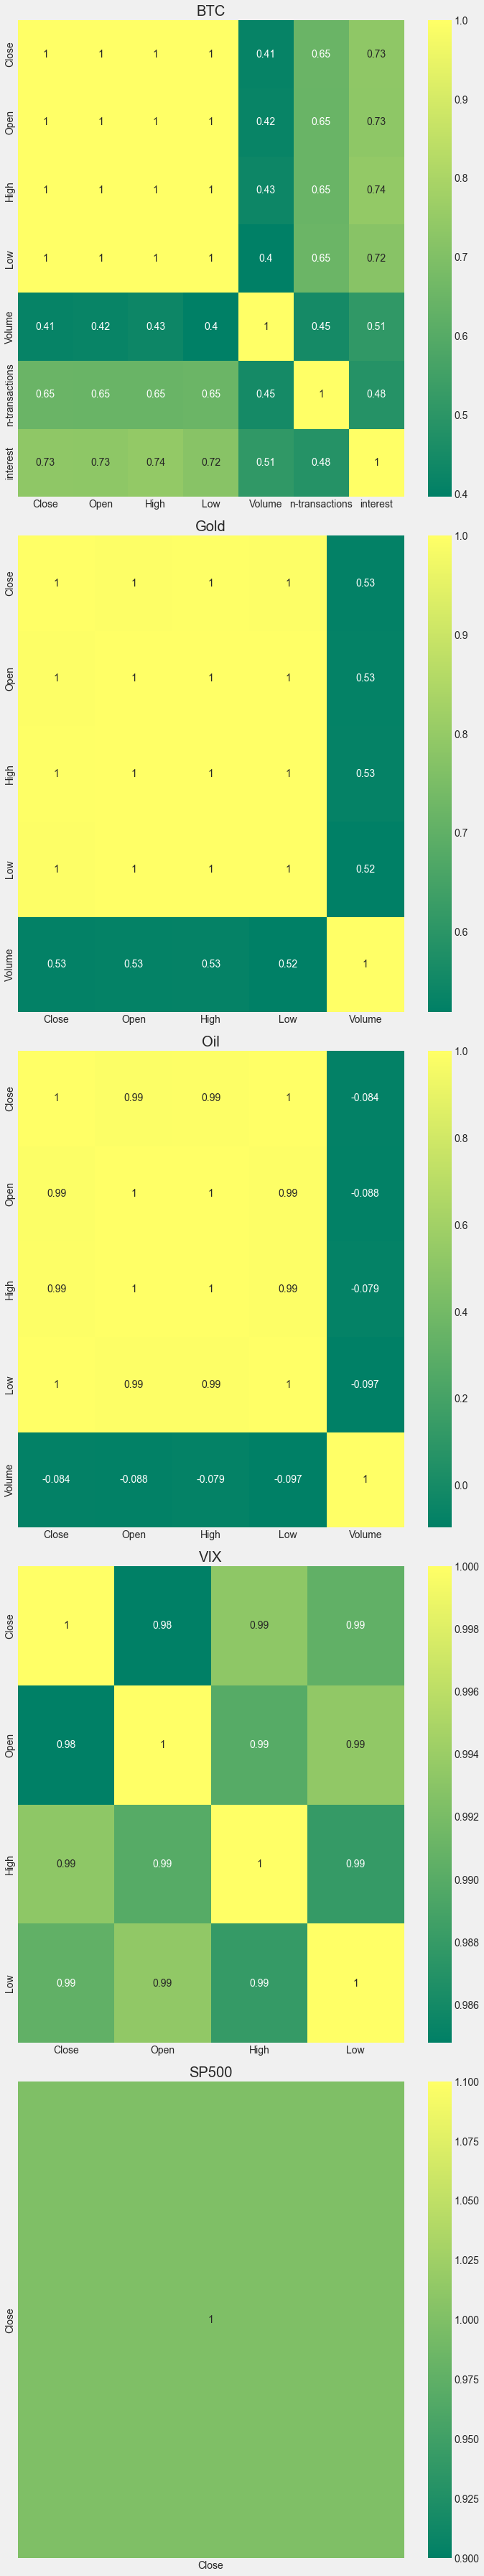

In [5]:
plt.figure(figsize=(10, 50))

for i, df in enumerate(dfs, 1):
    plt.subplot(5, 1, i)
    sns.heatmap(df.corr(), annot=True, cmap='summer')
    plt.title(f'{dfs_label[i - 1]}')
    
plt.tight_layout()

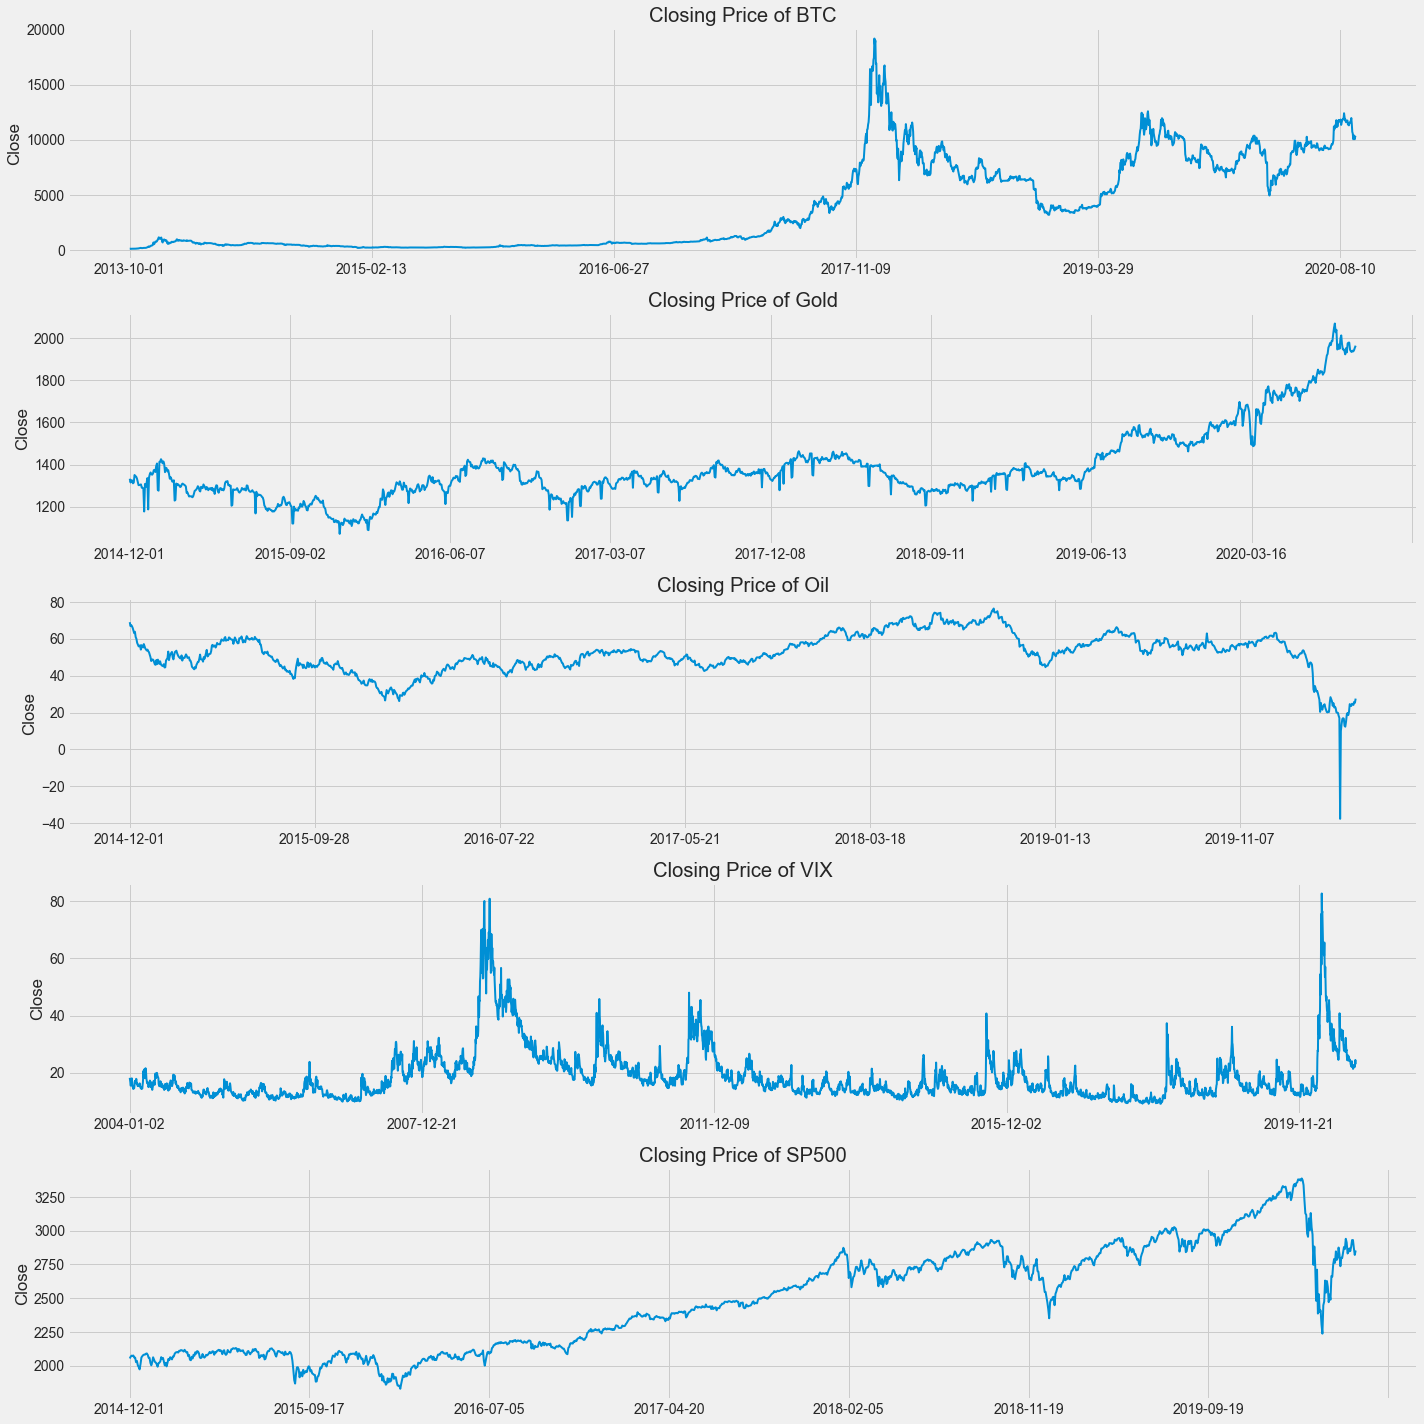

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(20,20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, df in enumerate(dfs, 1):
    plt.subplot(5, 1, i)
    df['Close'].plot(linewidth=2)
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {dfs_label[i - 1]}")    
plt.tight_layout()

An exception occurred
An exception occurred


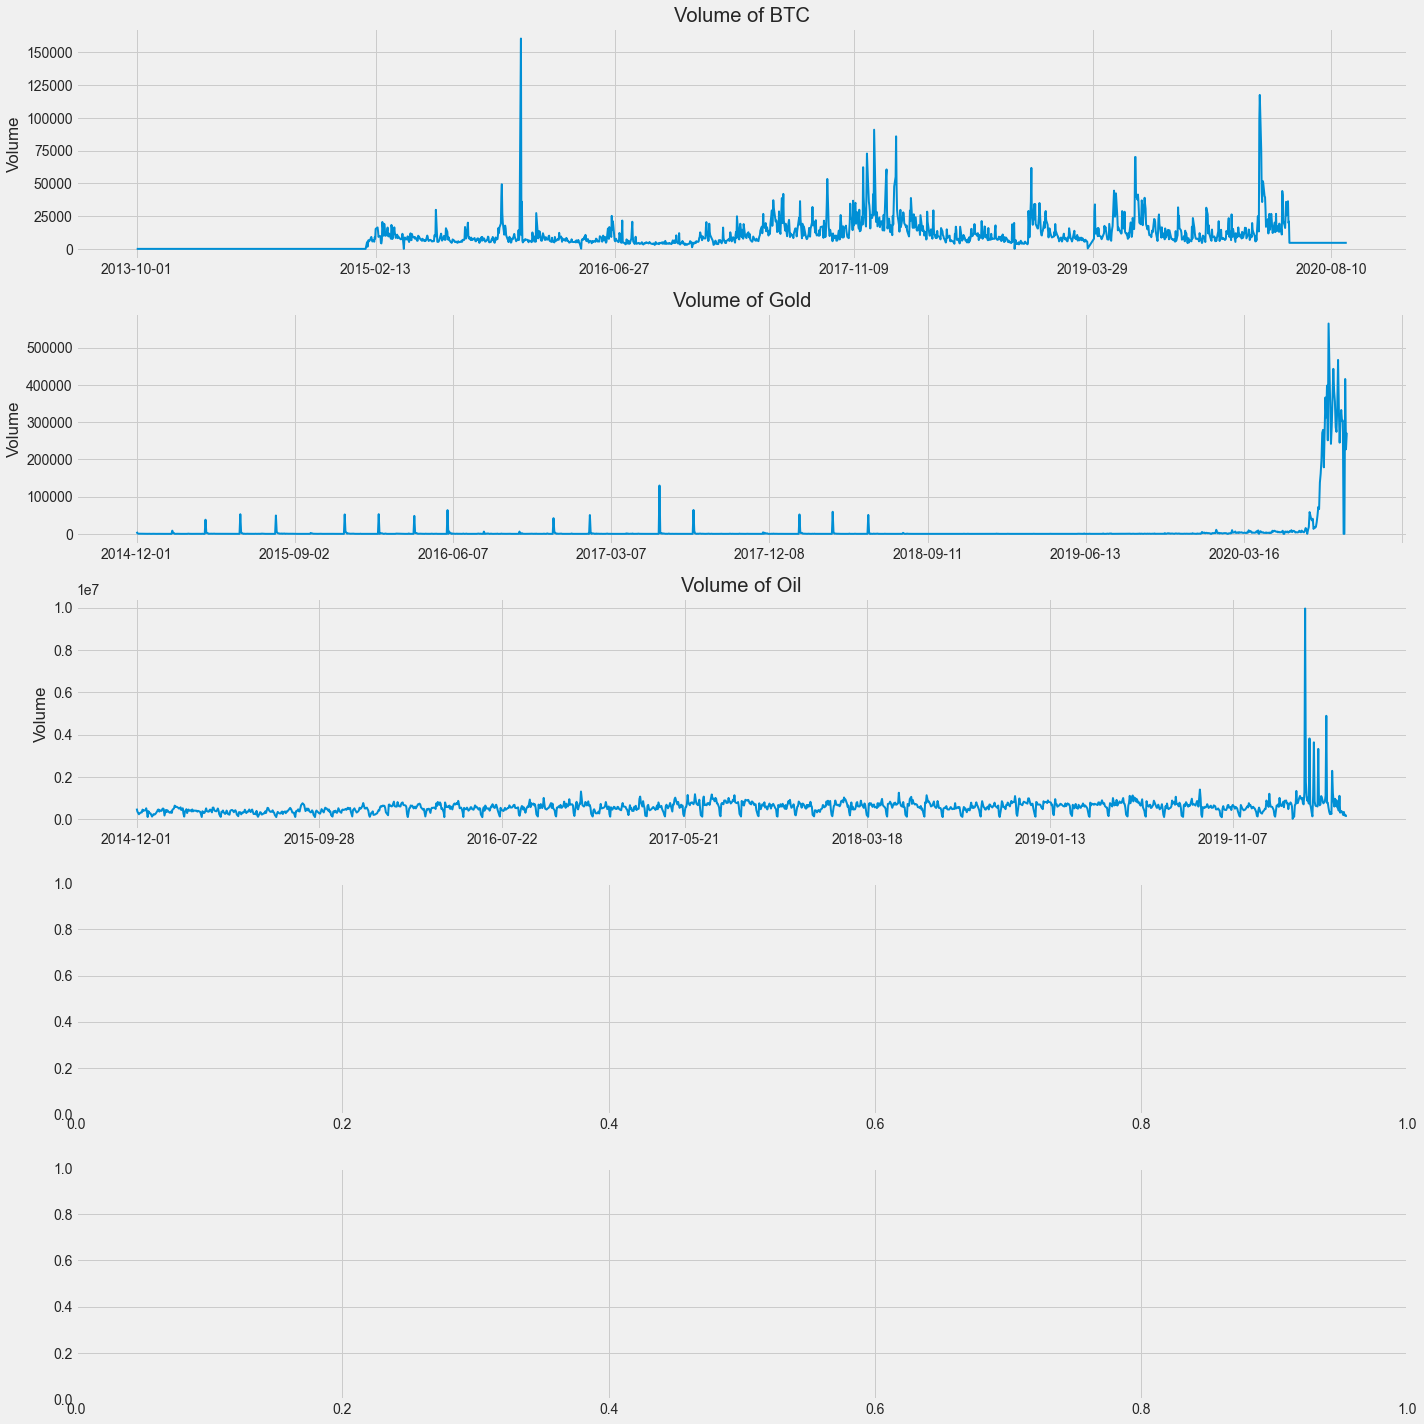

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(20,20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, df in enumerate(dfs, 1):
    try:
        plt.subplot(5, 1, i)
        df['Volume'].plot(linewidth=2)
        plt.ylabel('Volume')
        plt.xlabel(None)
        plt.title(f"Volume of {dfs_label[i - 1]}")
    except:
        print("An exception occurred")
plt.tight_layout()

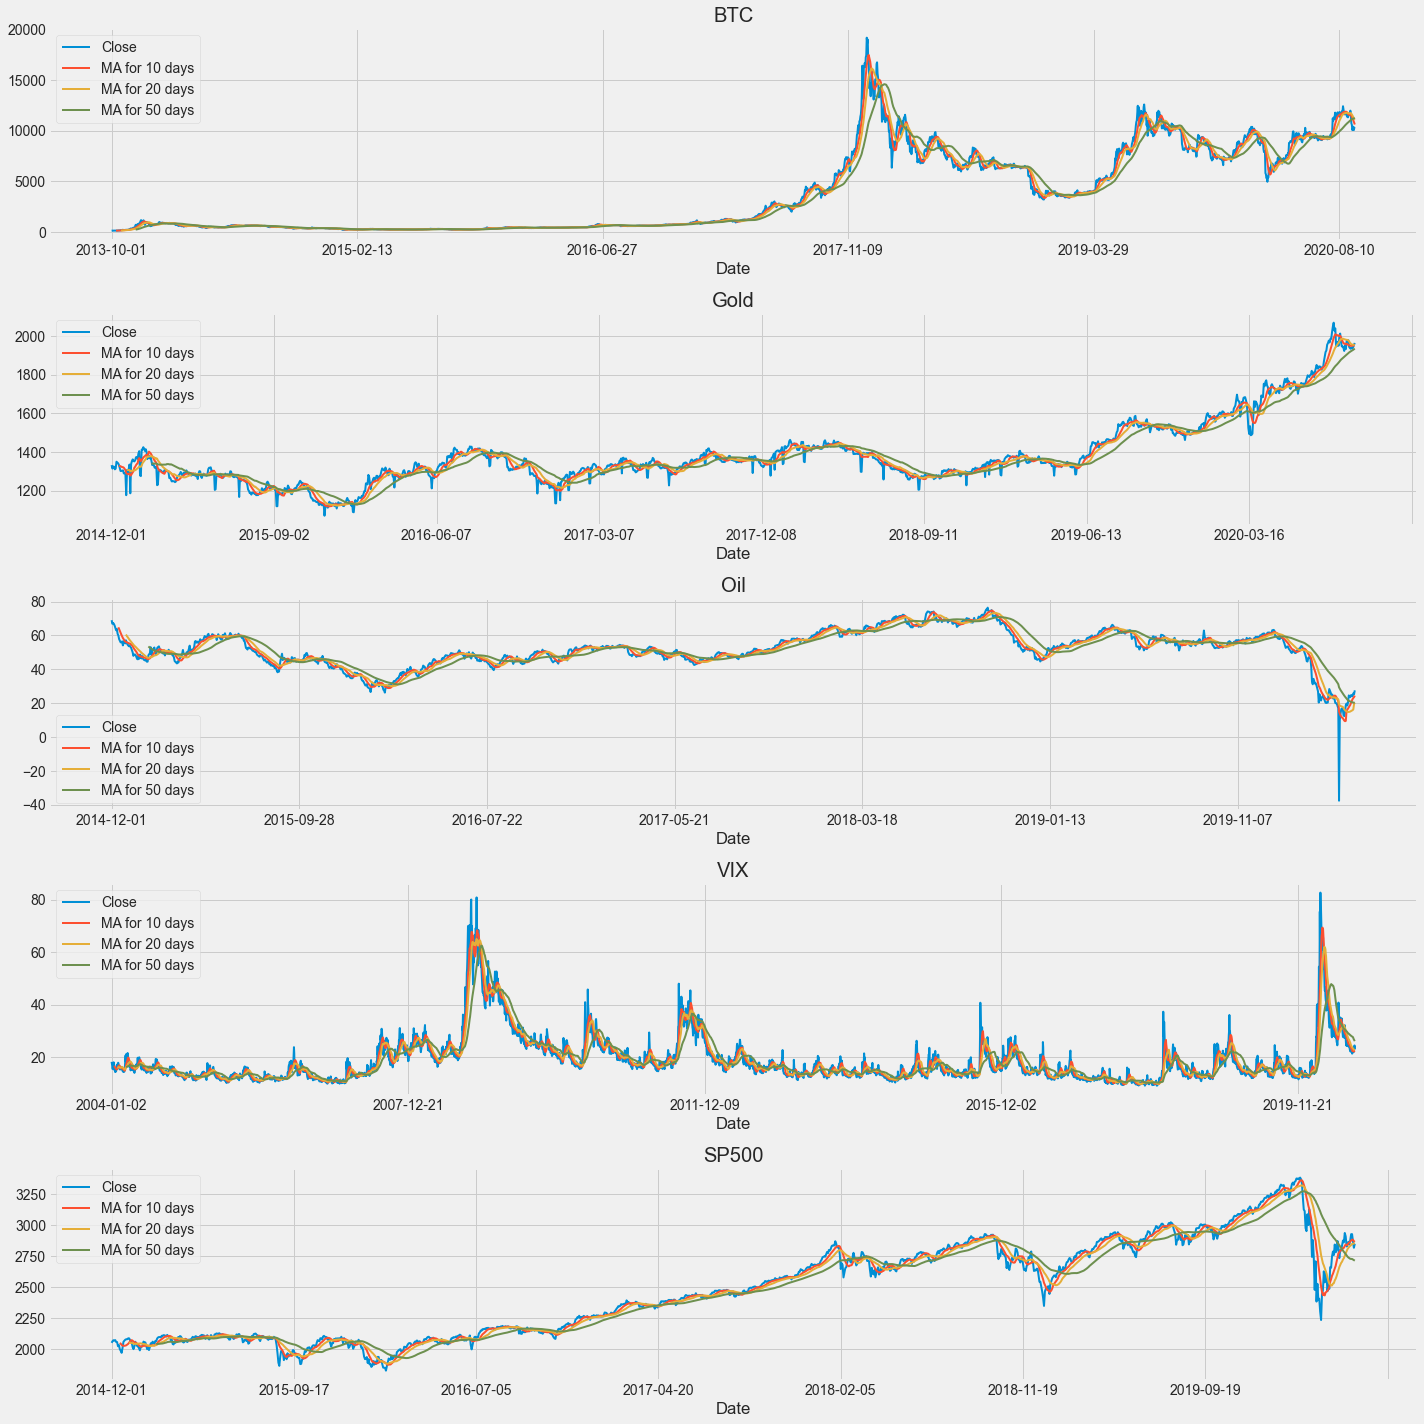

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for df in dfs:
        title = f"MA for {ma} days"
        df[title] = df['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=5, ncols=1)
fig.set_figheight(20)
fig.set_figwidth(20)

for i in range(0, 5):
    dfs[i][['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i],linewidth=2)
    axes[i].set_title(dfs_label[i])

fig.tight_layout()




# for df,t in zip(dfs, title): 
#     df['MA10_Close'] =  df['Close'].rolling(10).mean()
#     df['MA50_Close'] =  df['Close'].rolling(50).mean()  
#     df[['Close','MA10_Close','MA50_Close']].plot(linewidth=2,figsize=(20,3))  
#     # df['MA10_Close'].plot(linewidth=1,label='MA10_Close')  
#     # df['MA20_Close'].plot(linewidth=1,label='MA20_Close')  
#     plt.title(f'{t + " [close] and MA "}') 
#     plt.show()

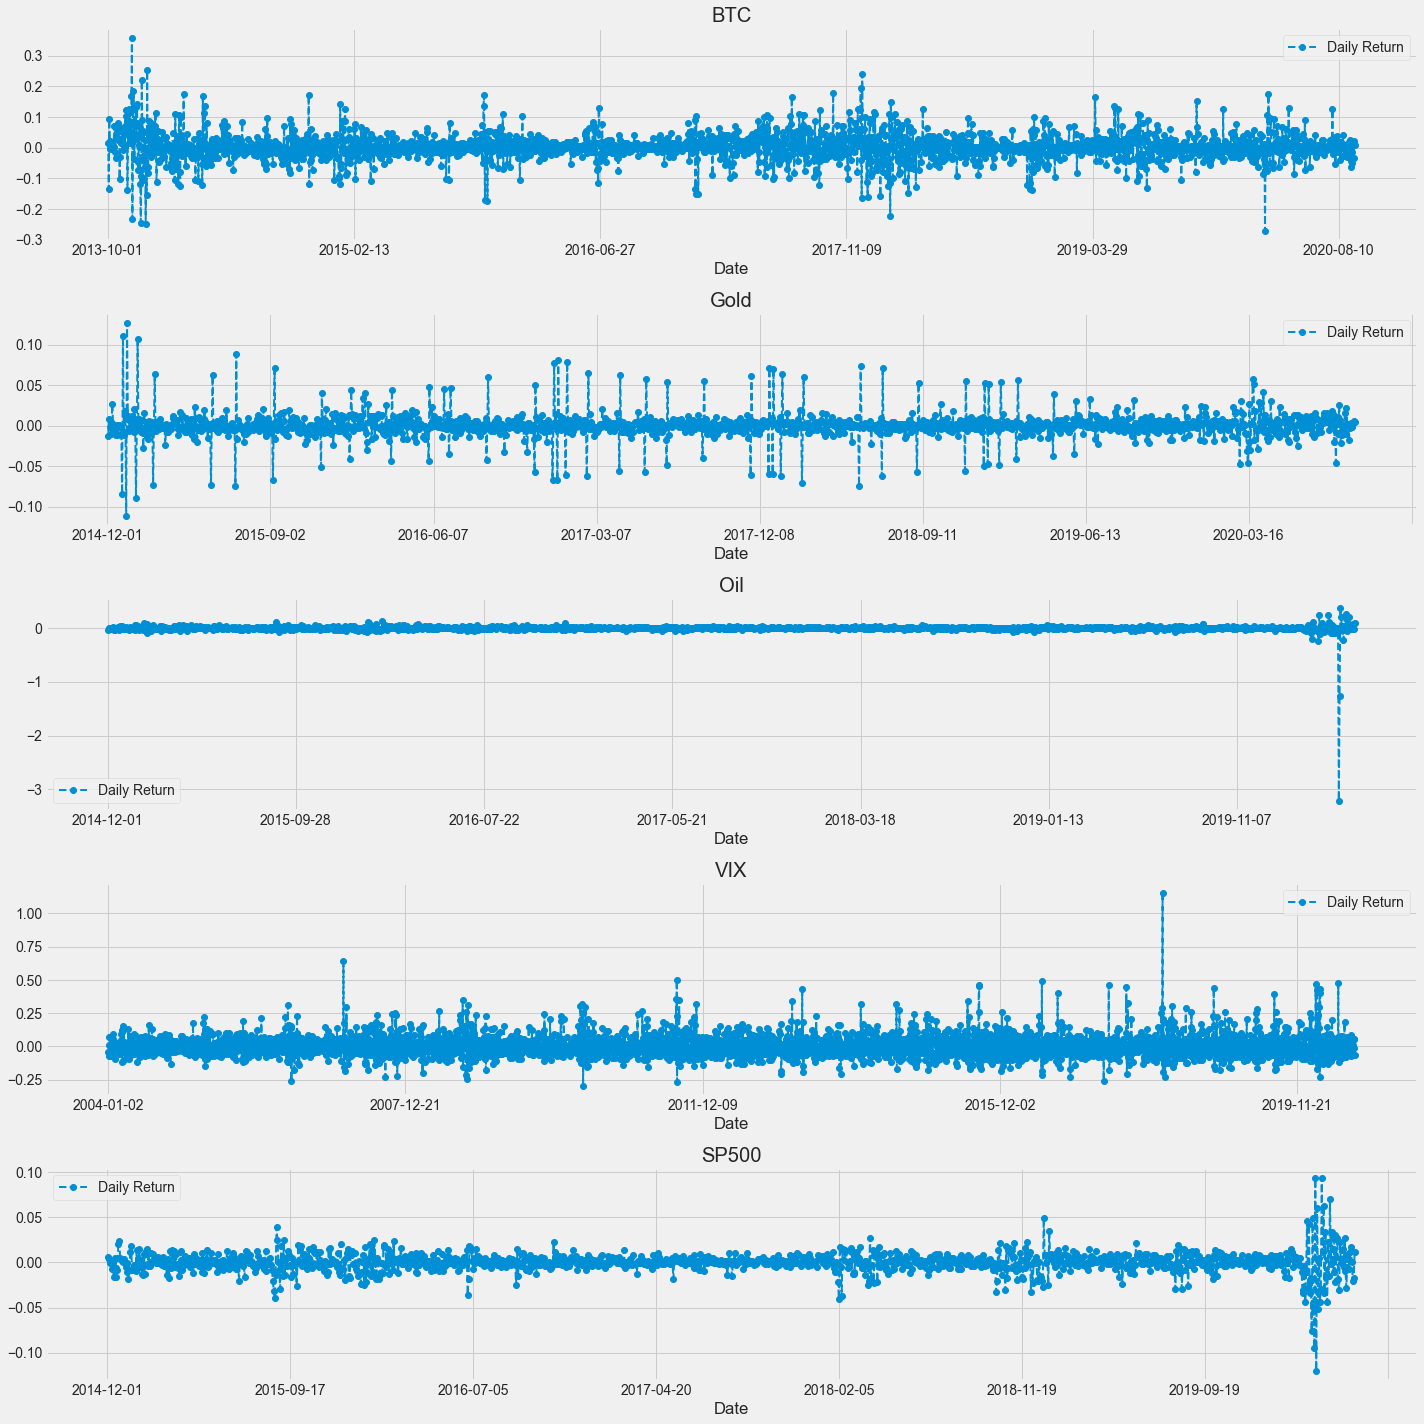

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=1)
fig.set_figheight(20)
fig.set_figwidth(20)

# We'll use pct_change to find the percent change for each day
for df in dfs:
    df['Daily Return'] = df['Close'].pct_change()

for i in range(0, 5):
    dfs[i]['Daily Return'].plot(ax=axes[i], legend=True, linestyle='--', marker='o',linewidth=2)
    axes[i].set_title(dfs_label[i])

fig.tight_layout()





# We'll use pct_change to find the percent change for each day
# for company in company_list:
#     company['Daily Return'] = company['Adj Close'].pct_change()

# # Then we'll plot the daily return percentage
# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.set_figheight(10)
# fig.set_figwidth(15)

# AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
# axes[0,0].set_title('APPLE')

# GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
# axes[0,1].set_title('GOOGLE')

# MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
# axes[1,0].set_title('MICROSOFT')

# AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
# axes[1,1].set_title('AMAZON')

# fig.tight_layout()

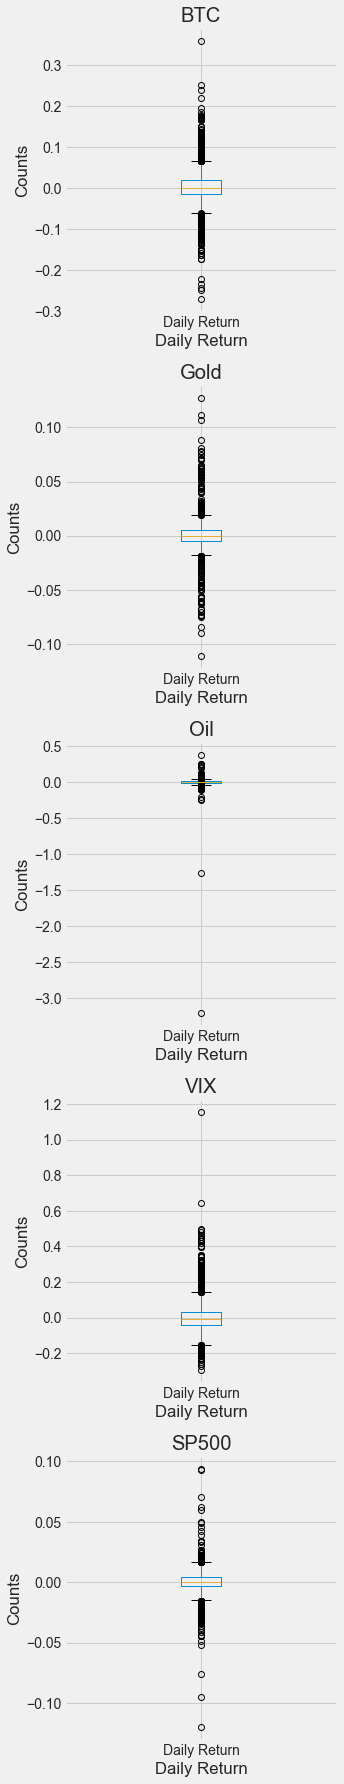

In [10]:
plt.figure(figsize=(5, 25))

for i, df in enumerate(dfs, 1):
    plt.subplot(5, 1, i)   
    df.boxplot(column='Daily Return')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{dfs_label[i - 1]}')
    
plt.tight_layout()

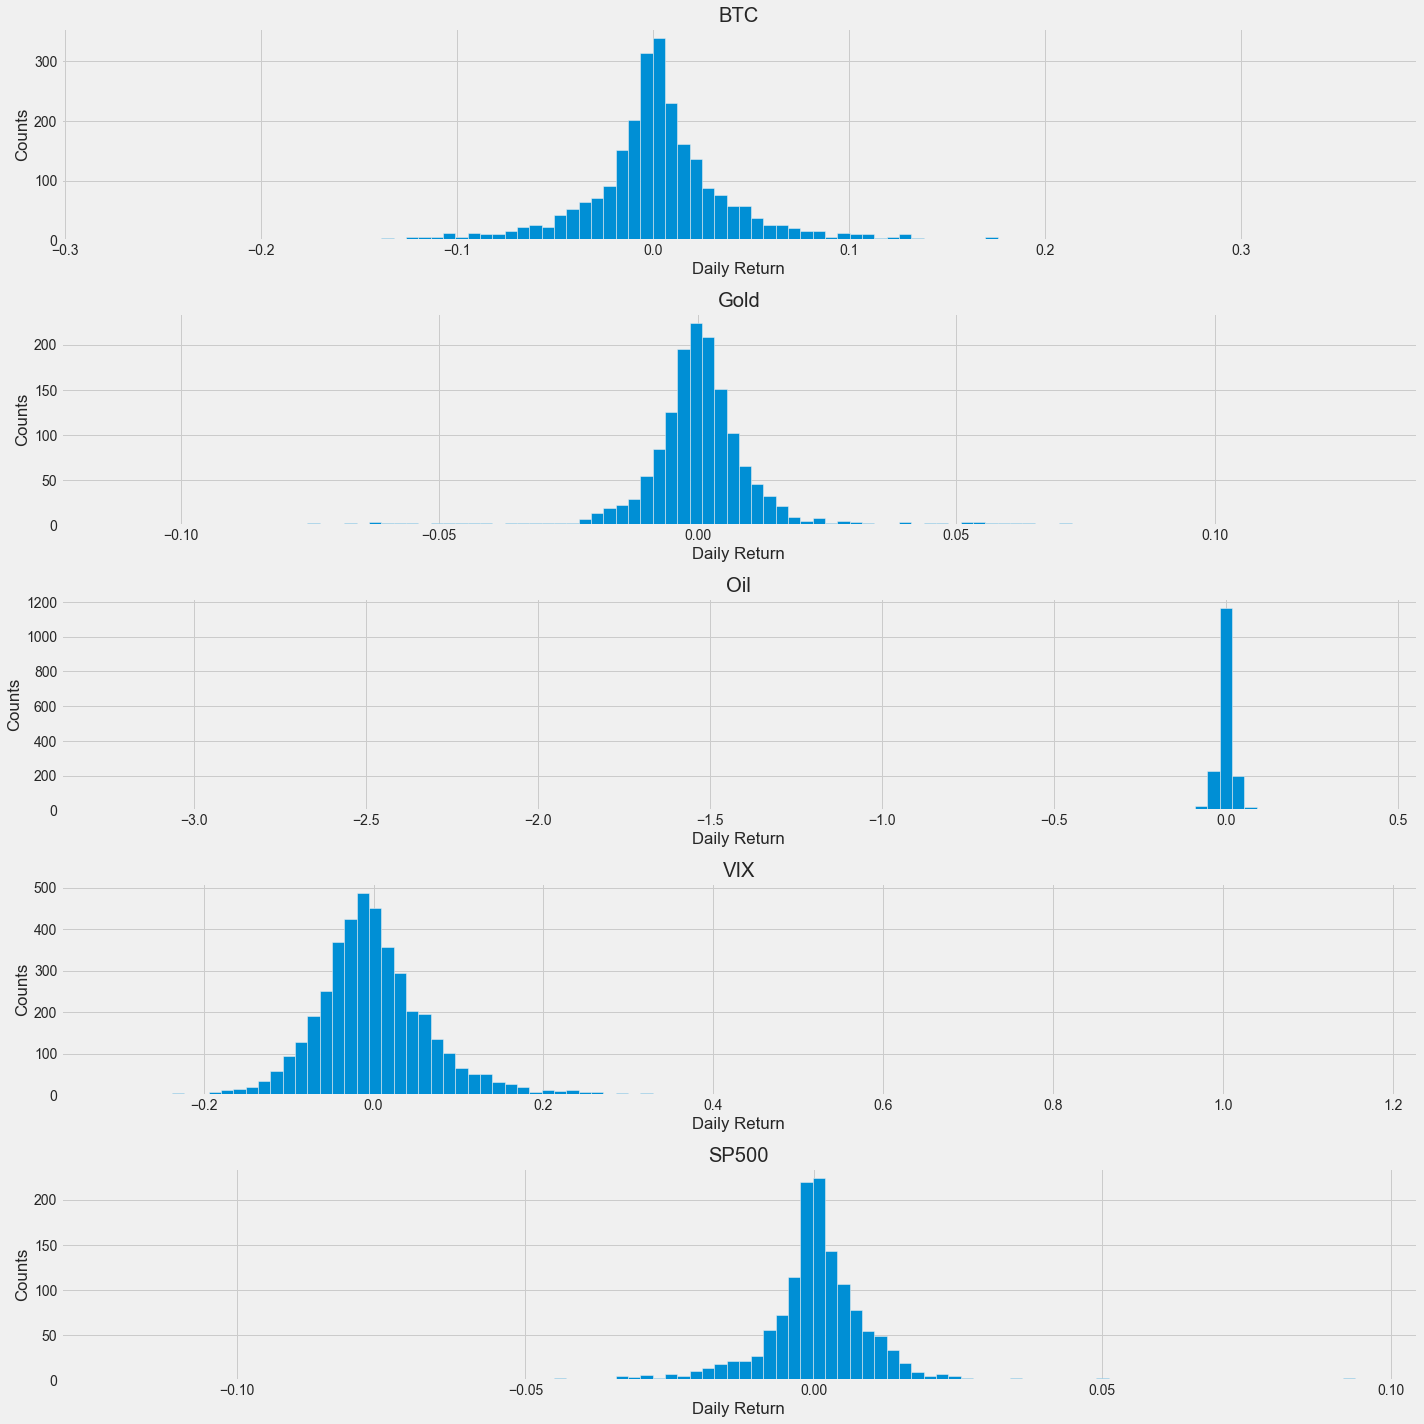

In [11]:
plt.figure(figsize=(20, 20))

for i, df in enumerate(dfs, 1):
    plt.subplot(5, 1, i)
    df['Daily Return'].hist(bins=100)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{dfs_label[i - 1]}')
    
plt.tight_layout()

In [12]:
closing_df  = pd.merge(dfs[0]['Close'],dfs[1]['Close'],left_index=True, right_index=True ,how='inner')
closing_df  = closing_df.merge(dfs[2]['Close'],left_index=True, right_index=True ,how='inner')
closing_df  = closing_df.merge(dfs[3]['Close'],left_index=True, right_index=True ,how='inner')
closing_df  = closing_df.merge(dfs[4]['Close'],left_index=True, right_index=True ,how='inner')

c:\Users\Bruce\anaconda3\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [13]:
closing_df.columns= dfs_label

In [14]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,BTC,Gold,Oil,VIX,SP500
Date,,,,,
2014-12-01,NaN,NaN,NaN,NaN,NaN
2014-12-02,0.004599,-0.013358,-0.030725,-0.100770,0.006384
2014-12-03,0.012147,0.008443,0.007476,-0.029572,0.003765
2014-12-04,-0.015871,-0.001207,-0.008459,-0.007217,-0.001162
2014-12-05,-0.021308,-0.010119,-0.014519,-0.045234,0.001665


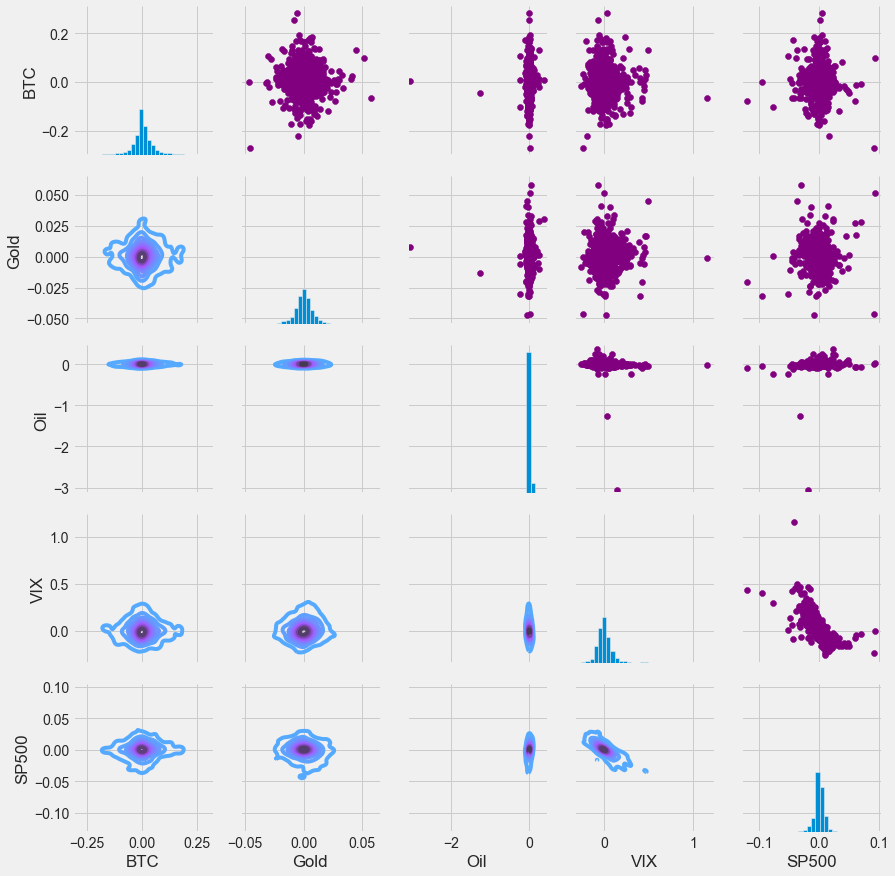

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

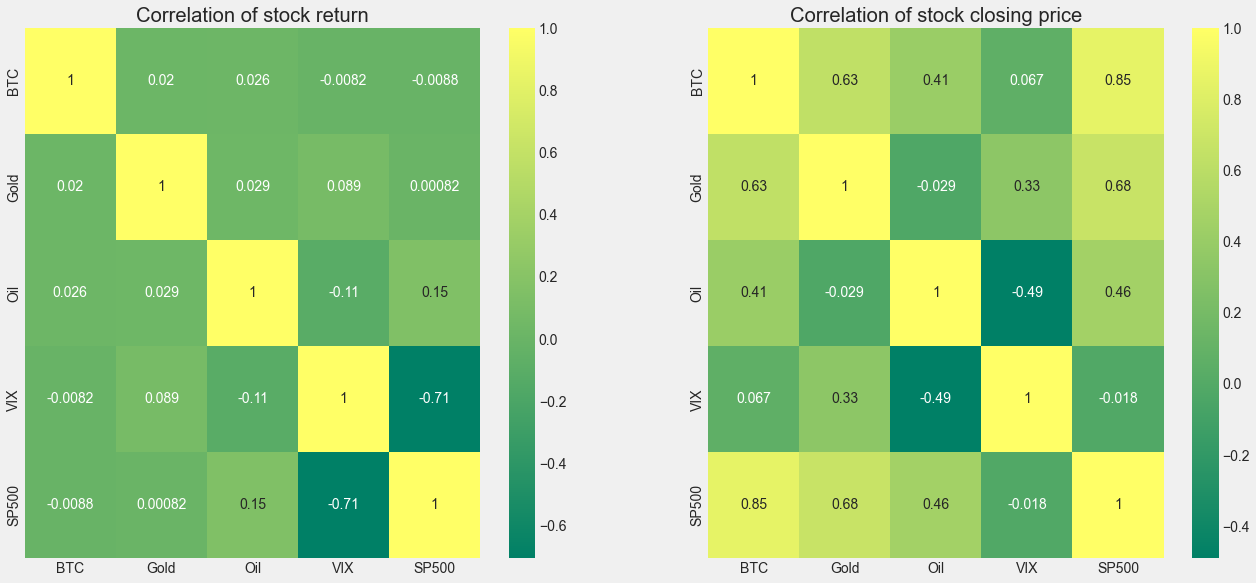

In [16]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [17]:
for i, df in enumerate(dfs, 1):
    df['Shift'] = df['Close'].shift(-30)   



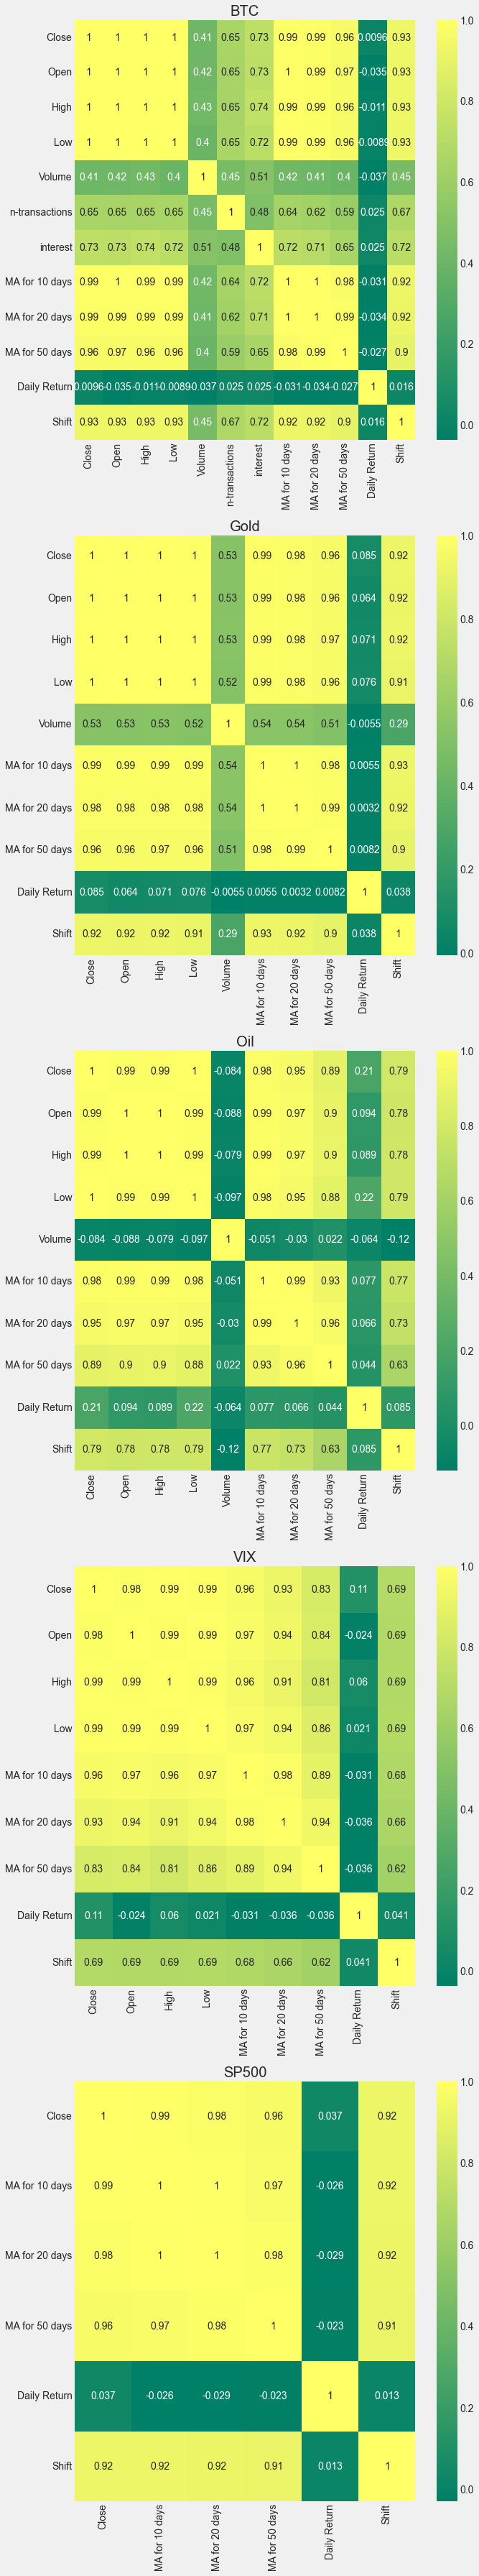

In [18]:
plt.figure(figsize=(10, 50))

for i, df in enumerate(dfs, 1):
    plt.subplot(5, 1, i)
    sns.heatmap(df.corr(), annot=True, cmap='summer')
    plt.title(f'{dfs_label[i - 1]}')
    
plt.tight_layout()

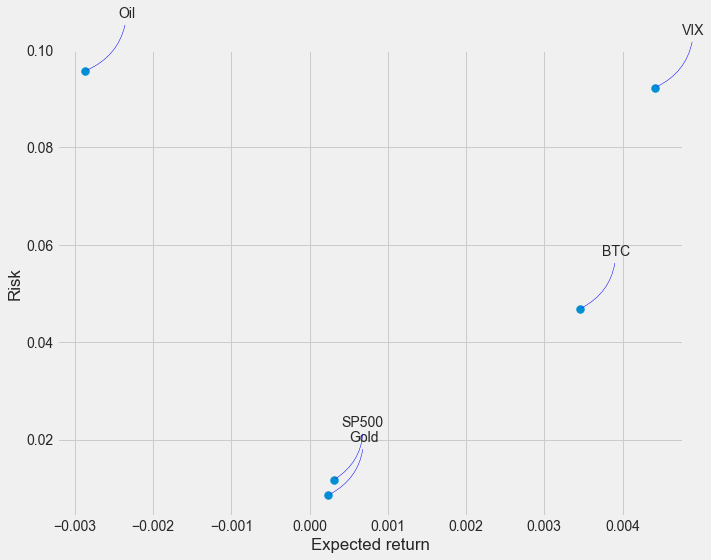

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

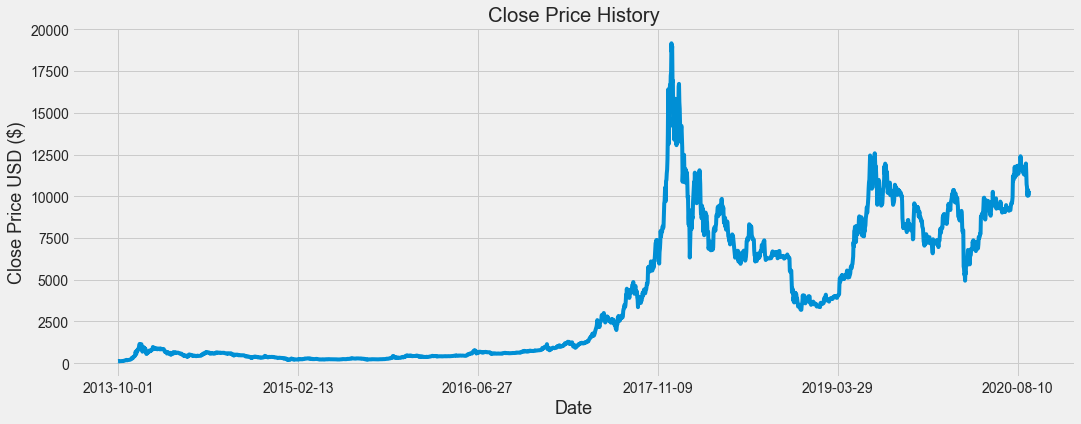

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
df_bc['Close'].plot()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
data = df_bc.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .70 ))

training_data_len

1774

In [22]:
dataset

array([[  123.65],
       [  125.46],
       [  108.58],
       ...,
       [10043.2 ],
       [10268.46],
       [10341.02]])

In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00079073],
       [0.0008857 ],
       [0.        ],
       ...,
       [0.52127251],
       [0.53309197],
       [0.53689922]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 100:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00079073, 0.0008857 , 0.        , 0.00052943, 0.00066952,
       0.00063384, 0.00069366, 0.0007582 , 0.00081172, 0.00091193,
       0.00087625, 0.00091036, 0.00093397, 0.00139886, 0.00129182,
       0.00179343, 0.00153948, 0.0018034 , 0.00230712, 0.00271586,
       0.00292417, 0.00362307, 0.00418293, 0.00483356, 0.00376632,
       0.00348665, 0.00362675, 0.00412312, 0.00441695, 0.00466041,
       0.004588  , 0.00469452, 0.00474069, 0.00482517, 0.0053378 ,
       0.00610964, 0.00732853, 0.00806731, 0.00975475, 0.01167569,
       0.00930351, 0.01030517, 0.01204508, 0.01305986, 0.01544568,
       0.01576838, 0.01635184, 0.01724804, 0.02109411, 0.0306988 ,
       0.02219284, 0.02445851, 0.03005237, 0.03492423, 0.03345559,
       0.03464457, 0.03572073, 0.0411682 , 0.04332893, 0.05035995,
       0.0549023 , 0.05199492, 0.04781146, 0.04828632, 0.05051316,
       0.05408376, 0.04701549, 0.0341503 , 0.03049731, 0.03847437,
       0.0424065 , 0.04506412, 0.03975727, 0.04211529, 0.0409

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout, Activation 

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM( 32, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=100, epochs=1)


17/17 [==============================] - 2s 42ms/step - loss: 0.0179


In [36]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 100: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])    
# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1387.061829876131

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Bruce\AppData\Local\Temp/ipykernel_17604/1606462354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


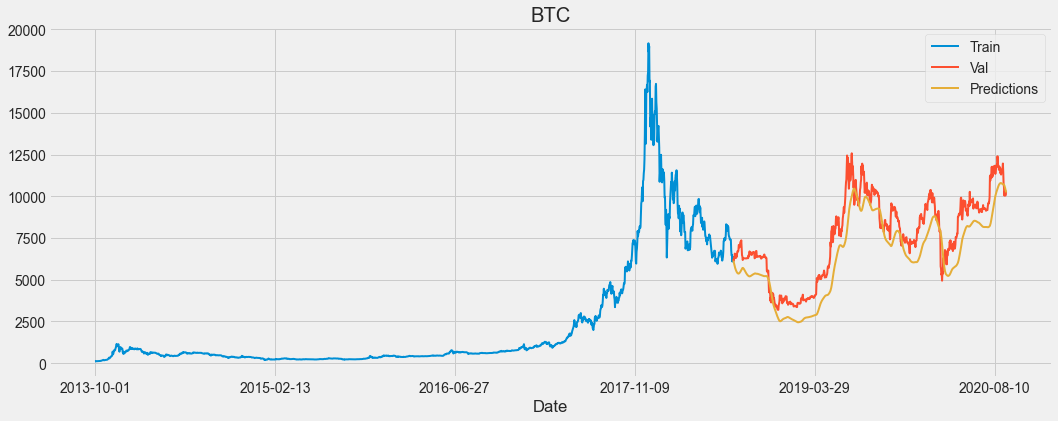

In [48]:
df_temp = train['Close']
df_temp = pd.DataFrame(df_temp)
df_temp = df_temp.merge(valid[['Close', 'Predictions']],left_index=True, right_index=True ,how='outer')
df_temp.columns= ['Train', 'Val', 'Predictions']
df_temp.head(5)

df_temp.plot(linewidth=2,figsize=(16,6),title='BTC')
plt.show()